********* X = 1.5 *********
0.4840557145311095
0.12046578397291796
0.1703425977942743
0.08805948865915525
0.0
2.252706313354622
1.445570898598703
***************************


<Figure size 700x400 with 0 Axes>

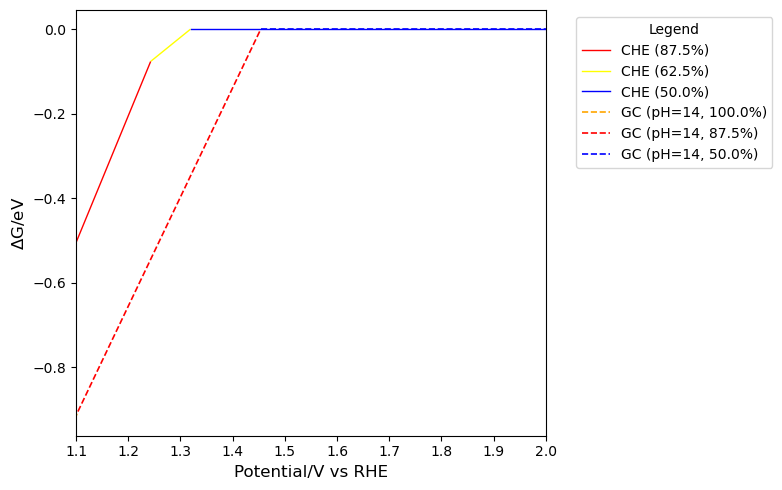

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from importlib import reload
plt = reload(plt)
import math
from matplotlib.colors import LinearSegmentedColormap


# Colors
nb_col=255
colors = np.array([
    [0, 1, 0],
    [0, 1, 1],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0.75, 0]
])

# Parameters
x1 = 1.1
x2 = 2
x = np.linspace(x1, x2, 500)
colors = ['orange', 'red', 'purple', 'yellow', 'blue', 'skyblue', 'grey', 'black', 'chocolate', "#FF7F00", 'goldenrod','olivedrab', 'mediumseagreen', 'darkturquoise', 'dodgerblue', "#7F00FF", "#FF00FF"]
plt.figure(figsize=(7, 4))

# Initialize lists
Eh2 = -6.81887017 #Eh2+TC
Eniox = 1.47

# Energie surface lorsqu'on retire des protons
Eche1 = [-676.02108809, -689.32318518, -702.20297825]
TC1 = [1.189364, 1.485348, 1.759278]
a1 = [-0.232526, -0.873459, -0.188445 ]
b1 = [0.780881, 0.756663, 0.142895]
c1 = [-678.896, -687.393, -702.161 ]

# Energie surface lorsqu'on ajoute des protons
# 100%/87%/75%/.../50%
Eche2 = [-741.02129767, -731.81539564, -721.91422363, -712.17416010, -702.20297825]
TC2 = [ 2.748944, 2.532234, 2.271235, 2.016544, 1.759278]
a2 = [ -0.219115, -0.210148, -0.180499, -0.198396, -0.188445 ]
b2 = [ -0.833624, -0.668542, -0.406846, -0.0713451, 0.142895 ]
c2 = [ -741.787, -732.375, -722.121, -712.172, -702.161 ]

for i in range(len(a1)):
    c1[i] = c1[i] + 2 * TC1[i]
    Eche1[i] = Eche1[i] + 2 * TC1[i]
for i in range(len(a2)):
    c2[i] = c2[i] + 2 * TC2[i]
    Eche2[i] = Eche2[i] + 2 * TC2[i]


# Display datas

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def display_specific_x_data_in_curve(curve, value):
    index = find_nearest(x, value)
    print("********* X = " + str(value) + " *********")
    for i in range(len(curve)):
        print(curve[i][index])
    print("***************************")

########
# Modification dans plotcurve pour inclure une légende
def plotcurve(pH, linestyle, che='0'):
    # Functions
    def qf(x, a, b, c):
        x = x - Eph
        return a * x**2 + b * x + c

    def che1(x, E, coef):
        return E / 2 + coef * (Eh2 / 2 - x)

    def che2(x, E, coef):
        return E / 2 - coef * (Eh2 / 2 - x)

    # Variables
    Eph = 8.62858 * 10 ** (-5) * 300 * pH * math.log(10)
    ygc, yche, ygc1, yche1 = [], [], [], []
    refgc = che1(x, qf(x, a1[-1], b1[-1], c1[-1]), 0)
    shift = -0.02
    xchen, ychen = [[] for _ in range(len(a1) + len(a2) - 1)], [[] for _ in range(len(a1) + len(a2) - 1)]
    xgcn, ygcn = [[] for _ in range(len(a1) + len(a2) - 1)], [[] for _ in range(len(a1) + len(a2) - 1)]

    # Curve
    if che == 'che':
        for i in range(len(a1)):
            if i != len(a1) - 1:
                yche1.append((che1(x, Eche1[i], len(a1) - 1 - i)) - Eche1[-1] / 2)
        for i in range(len(a2)):
            yche.append((che2(x, Eche2[i], len(a2) - 1 - i)) - Eche2[-1] / 2)
        for i in range(len(yche1)):
            yche.append(yche1[len(yche1) - i - 1])
    else:
        for i in range(len(a1)):
            if i != len(a1) - 1:
                ygc1.append((che1(x, qf(x, a1[i], b1[i], c1[i]), len(a1) - 1 - i)) - refgc)
        for i in range(len(a2)):
            ygc.append((che2(x, qf(x, a2[i], b2[i], c2[i]), len(a2) - 1 - i)) - refgc)
        for i in range(len(ygc1)):
            ygc.append(ygc1[len(yche1) - i - 1])

        display_specific_x_data_in_curve(ygc, 1.5)


    # Min. curve CHE
    if che == 'che':
        for i in range(len(yche)):
            for j in range(len(yche[i])):
                if np.min(yche, axis=0)[j] == yche[i][j]:
                    ychen[i].append(yche[i][j])
                    xchen[i].append(x[j])
        for i in range(len(xchen)):
            if xchen[i] != []:
                plt.plot(
                    xchen[i], ychen[i],
                    label=f'CHE ({format((8 - i) / 8, ".1%")})',
                    linewidth=1, c=colors[i], linestyle=linestyle)
    else:
        for i in range(len(ygc)):
            for j in range(len(ygc[i])):
                if np.min(ygc, axis=0)[j] == ygc[i][j]:
                    ygcn[i].append(ygc[i][j])
                    xgcn[i].append(x[j])
        for i in range(len(xgcn)):
            if xgcn[i] != []:
                plt.plot(
                    xgcn[i], ygcn[i],
                    label=f'GC (pH={pH}, {format((8 - i) / 8, ".1%")})',
                    linewidth=1.2, c=colors[i], linestyle=linestyle)


# Placement de la légende hors de la figure
plt.figure(figsize=(8, 5))

plotcurve(0, "-", "che")
plotcurve(14, "--")

# Ajustement des paramètres
plt.xlim(x1, x2)
plt.xlabel('Potential/V vs RHE', fontsize=12)
plt.ylabel('$\Delta$G/eV', fontsize=12)

# Positionnement de la légende hors de la figure
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    fontsize=10,
    title="Legend"
)

# Afficher le graphique
plt.tight_layout()

#plt.savefig('/Users/ltreps/Downloads/CHE_Mn10x10.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()




